#### In this project, i will be gathering, assessing, and cleaning data then act on it through analysis, visualization and/or modeling.

### Data Gathering:
#### There are three data sources that we need to look for gathering data
- twitter-archive-enhanced.csv provided as CSV file.
- image prediction, we have to download it using the provided URL.
- tweet-json , we have to download this programtically using twitter API

In [606]:
import numpy as np
import pandas as pd
import seaborn as sns
import tweepy
import json
import matplotlib.pyplot as plt
import os
import re
import requests
from datetime import datetime
from functools import reduce
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

In [607]:
# 1. Reading the archived data from csv file
twitter_archivedf=pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_archivedf.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [608]:
# 2. Scraping the image predictions file from the provided Udacity URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)

img_predictions_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
img_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1695,816336735214911488,https://pbs.twimg.com/media/C1Q17WdWEAAjKFO.jpg,1,Labrador_retriever,0.919330,True,kuvasz,0.049480,True,golden_retriever,0.011934,True
585,678991772295516161,https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg,1,Eskimo_dog,0.330216,True,Siberian_husky,0.187003,True,Chihuahua,0.101420,True
513,676219687039057920,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True
790,690649993829576704,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1,bighorn,0.215438,False,hyena,0.137928,False,Mexican_hairless,0.098171,True
593,679475951516934144,https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg,1,Maltese_dog,0.145742,True,toy_poodle,0.139407,True,West_Highland_white_terrier,0.108821,True


In [609]:
#3. Connecting to twitter API using twitter developer credentials
import tweepy

consumer_key = 'XXXXXX'
consumer_secret = 'XXXXXXX'
access_token = 'XXXXXX'
access_secret = 'XXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [610]:
# Using the tweet IDs in the Twitter archive(twitter_archivedf), query the Twitter API for each tweet's JSON

tweet_ids = list(twitter_archivedf.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968


Rate limit reached. Sleeping for: 675


Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 670


In [611]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)


In [612]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.sample(5)

,tweet_id,retweets,favorites
1519,689661964914655233,972,3303
2080,670691627984359425,247,591
2099,670411370698022913,906,2017
833,765395769549590528,3614,27629
2217,668113020489474048,243,664


### Data Assesment
#### We have successfully gathered data from three different data sources and have stored them in the following data frames. We will proceed by assesing these gathered data
- twitter_archivedf, has the tweet's text, rating, and dog category
- img_predictions_df, contains the results of a neural network trying to identify dog breed in a tweet's picture 
- tweets_df, contains retweets and favorite counts

In [613]:
twitter_archivedf.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


### twitter_archivedf (Twitter archive) columns:

- tweet_id: the unique identifier for each tweet
- in_reply_to_status_id: if the represented Tweet is a reply, this field - will contain the integer representation of the original Tweet’s ID
- in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- timestamp: time when this Tweet was created
- source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- text: actual UTF-8 text of the status update
- retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- retweeted_status_timestamp: time of retweet
- expanded_urls: tweet URL
- rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
- rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- name: name of the dog
- doggo: one of the 4 dog "stage"
- floofer: one of the 4 dog "stage"
- pupper: one of the 4 dog "stage"
- puppo: one of the 4 dog "stage"

In [614]:
#exploring the name column
twitter_archivedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [615]:
#Checking for duplicate values
twitter_archivedf.duplicated().sum()

0

In [616]:
twitter_archivedf.query('retweeted_status_id != "NaN" & retweeted_status_user_id != "NaN"')[['retweeted_status_id','retweeted_status_user_id']].count()

retweeted_status_id         181
retweeted_status_user_id    181
dtype: int64

In [617]:
#sorting the numerator values in descending order
twitter_archivedf.rating_numerator.sort_values(ascending=False)[:30]

979     1776
313     960 
189     666 
188     420 
2074    420 
1120    204 
290     182 
902     165 
1779    144 
1634    143 
1635    121 
1228    99  
1843    88  
433     84  
1254    80  
695     75  
340     75  
1351    60  
1202    50  
1274    45  
1433    44  
763     27  
1712    26  
516     24  
1663    20  
55      17  
285     15  
291     15  
83      14  
866     14  
Name: rating_numerator, dtype: int64

In [618]:
#Exploring the other denominator values apart from the value 10
twitter_archivedf.query('rating_denominator != 10')['rating_denominator']

313     0  
342     15 
433     70 
516     7  
784     11 
902     150
1068    11 
1120    170
1165    20 
1202    50 
1228    90 
1254    80 
1274    50 
1351    50 
1433    40 
1598    20 
1634    130
1635    110
1662    11 
1663    16 
1779    120
1843    80 
2335    2  
Name: rating_denominator, dtype: int64

In [619]:
#looks like instead of NAN none has been used
twitter_archivedf.query('name=="None"')[['name','doggo','floofer','pupper','puppo']].count()

name       745
doggo      745
floofer    745
pupper     745
puppo      745
dtype: int64

In [620]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### img_predictions_df (tweet image predictions) columns:

- tweet_id: the unique identifier for each tweet
- jpg_url: dog's image URL
- img_num: the image number that corresponded to the most confident - --prediction (numbered 1 to 4 since tweets can have up to four images)
- p1: algorithm's #1 prediction for the image in the tweet
- p1_conf: how confident the algorithm is in its #1 prediction
- p1_dog: whether or not the #1 prediction is a breed of dog
- p2: algorithm's #2 prediction for the image in the tweet
- p2_conf: how confident the algorithm is in its #2 prediction
- p2_dog: whether or not the #2 prediction is a breed of dog
- p3: algorithm's #3 prediction for the image in the tweet
- p3_conf: how confident the algorithm is in its #3 prediction
- p3_dog: whether or not the #3 prediction is a breed of dog

In [621]:
img_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
89,667534815156183040,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,1,Pembroke,0.435254,True,Cardigan,0.307407,True,cocker_spaniel,0.033158,True
1947,862722525377298433,https://pbs.twimg.com/media/C_kBjuUUIAArs2-.jpg,1,basset,0.393330,True,beagle,0.242034,True,boxer,0.077692,True
750,687826841265172480,https://pbs.twimg.com/media/CYum3KbWEAArFrI.jpg,1,Pomeranian,0.997210,True,Pekinese,0.000803,True,keeshond,0.000373,True
286,671151324042559489,https://pbs.twimg.com/media/CVBokRSWsAADuXx.jpg,1,Rottweiler,0.781201,True,black-and-tan_coonhound,0.061206,True,kelpie,0.048856,True
1967,867900495410671616,https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg,1,Labrador_retriever,0.522644,True,kuvasz,0.332461,True,dalmatian,0.032008,True


In [622]:
#times when the prediction is not a breed of dog and has False values
img_predictions_df.query('p1_dog==False & p2_dog==False & p3_dog==False').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [623]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 3 columns):
tweet_id     2335 non-null object
retweets     2335 non-null int64
favorites    2335 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


#### Tweets_df columns:
- tweet_id: the unique identifier for each tweet
- retweets: number of times this Tweet has been retweeted
- favorites: indicates approximately how many times this Tweet has been liked by Twitter users

### Quality Issues
#### archive df (twitter_archivedf)

- 181 tweets are retweets ('retweeted_status_id', 'retweeted_status_user_id')
- some tweets are replies to other tweets ('in_reply_to_status_id', 'in_reply_to_user_id')
- Removed unnecessary columns such as retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,in_reply_to_status_id, in_reply_to_user_id
- html tags in source column in place of utility name
- 'name', 'doggo', 'floofer', 'pupper', and 'puppo' columns have string values of "None" instead of NaN
- timestamp column value is a string object
- tweet_id is an integer
- Mismatch in dog ratings and the rating in the text.

#### predictions df (img_predictions_df)
- The number of tweets in this df is less than the archived dataframe and tweet info dataframe.
- tweet_id has different data type

#### tweet df (tweets_df)
- The number of tweets in this df is lesser than the archive dataframe

### Tidiness Issues
- columns 'doggo', 'floofer', 'pupper', and 'puppo' can be brought under one variable
- Assigning only one stage to each dog
- df_archive and tweet_df are part of one observational unit
- Identifying the dog breed for a given tweet


### Data Cleanliness

In [624]:
arch_clean = twitter_archivedf.copy()
imgpred_clean = img_predictions_df.copy()
tweets_clean = tweets_df.copy()

### Cleaning Quality issues
### 1. Define
Remove retweets.

In [625]:
#code
arch_clean=arch_clean[arch_clean.retweeted_status_id.isnull()]
arch_clean=arch_clean[arch_clean.retweeted_status_user_id.isnull()]

In [626]:
#test
print(arch_clean.retweeted_status_id.isnull().sum())
print(arch_clean.retweeted_status_user_id.isnull().sum())

2175
2175


### 2. Define
Remove tweets which are replies

In [627]:
#code
arch_clean=arch_clean[arch_clean.in_reply_to_status_id.isnull()]
arch_clean=arch_clean[arch_clean.in_reply_to_user_id.isnull()]

In [628]:
#test
print(arch_clean.in_reply_to_status_id.isnull().sum())
print(arch_clean.in_reply_to_user_id.isnull().sum())

2097
2097


### 3. Define
Removing retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id,in_reply_to_user_id from archive df as we do not need them anymore.

In [629]:
#code
arch_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],inplace=True)

In [630]:
#test
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### 4. Define
Extract utility from the given URL.

In [631]:
#code
arch_clean.source = arch_clean.source.apply(lambda x: x.split('/')[-2]).str.extract('>(\D+)<')

In [632]:
#test
arch_clean.source.sample(5)

2232    Twitter for iPhone
2166    Twitter for iPhone
554     Twitter for iPhone
801     Twitter for iPhone
257     Twitter for iPhone
Name: source, dtype: object

###  5. Define
Replacing "None" values in following columns with NaN. 
- name                          
- doggo                         
- floofer                       
- pupper                        
- puppo   

In [633]:
#code
columns=['name','doggo','floofer','pupper','puppo']
for col in columns:
    arch_clean[col]=arch_clean[col].apply(lambda x: np.NaN if x =="None" else x)

In [634]:
#test
arch_clean[['name','doggo','floofer','pupper','puppo']].tail()

,name,doggo,floofer,pupper,puppo
2351,NaN,NaN,NaN,NaN,NaN
2352,a,NaN,NaN,NaN,NaN
2353,a,NaN,NaN,NaN,NaN
2354,a,NaN,NaN,NaN,NaN
2355,NaN,NaN,NaN,NaN,NaN


### 6. Define
Timestamp has wrong data type instead it should be datetime

In [635]:
#code
arch_clean.timestamp=pd.to_datetime(arch_clean.timestamp)

In [636]:
#test
arch_clean.timestamp.dtypes

dtype('<M8[ns]')

### 7. Define
tweet_id is not the correct data type

In [637]:
#code converting tweet_id from int to object datatype
arch_clean.tweet_id=arch_clean.tweet_id.astype(str)

In [638]:
#test
arch_clean.dtypes

tweet_id              object        
timestamp             datetime64[ns]
source                object        
text                  object        
expanded_urls         object        
rating_numerator      int64         
rating_denominator    int64         
name                  object        
doggo                 object        
floofer               object        
pupper                object        
puppo                 object        
dtype: object

### Misspelled and missing Dogs names 
 

In [639]:
#code
arch_clean.text[arch_clean.name.isnull()].sample(30)

1599    Your fav crew is back and this time they're embracing cannabis culture. 12/10 for all https://t.co/oSvRDuMm1D                                            
1449    This poor pupper has been stuck in a vortex since last week. Please keep her in your thoughts. 10/10 https://t.co/7ODQWHwYDx                             
1991    This lil pupper is sad because we haven't found Kony yet. RT to spread awareness. 12/10 would pet firmly https://t.co/Cv7dRdcMvQ                         
2237    This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2             
1090    We only rate dogs. Pls stop sending in non-canines like this Slovak Car Bunny. It makes my job very difficult. 11/10 https://t.co/VflvQLH2y5             
1784    In honor of the new Star Wars movie. Here's Yoda pug. 12/10 pet really well, would I https://t.co/pvjdRn00XH                                             
2344    Here we have a north

<b>It seems even in the text dog names are missing and that is why these values are NULL here.

In [640]:
imgpred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 8. Define
tweet_id is int type. converting it to object type

In [641]:
imgpred_clean.tweet_id=imgpred_clean.tweet_id.astype(str)

In [642]:
imgpred_clean.dtypes

tweet_id    object 
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

In [643]:
imgpred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 9. Define Correcting the rating

In [644]:
#code
#visually checking those ratings that do not match with the ratings in the text
pd.set_option('display.max_colwidth', -1)
arch_clean.loc[arch_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']] 


,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [645]:
# For those mismatched numerator and denominator ratings , correcting them
arch_clean.loc[arch_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
arch_clean.loc[arch_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
arch_clean.loc[arch_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
arch_clean.loc[arch_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
arch_clean.loc[arch_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]

#calculating the actual rating
arch_clean['rating']=arch_clean.rating_numerator/arch_clean.rating_denominator
arch_clean.loc[arch_clean.rating>2,['tweet_id','text','rating']]

,tweet_id,text,rating
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,3.428571
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.500000
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.700000
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.600000
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.600000
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.000000


In [646]:
arch_clean.loc[arch_clean.tweet_id=='786709082849828864','rating']=1.0
arch_clean.loc[arch_clean.tweet_id=='778027034220126208','rating']=1.1
arch_clean.loc[arch_clean.tweet_id=='680494726643068929','rating']=1.1

In [647]:
arch_clean.rating=arch_clean.rating.round(2) #rounding of the decimal places to two
arch_clean.rating.sort_values().sample(5)

2278    1.2
362     1.1
3       1.3
308     1.1
1667    1.1
Name: rating, dtype: float64

## Cleaning tidyness issues
### 1. Define issue
creating one single column to identify the dog stages

In [648]:
#code
arch_clean['stage'] = arch_clean[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
arch_clean['stage'] = arch_clean['stage'].apply(lambda x: x.replace('nan', ''))
arch_clean['stage'] = arch_clean['stage'].apply(lambda x: np.NaN if x == '' else x)
arch_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [649]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
rating                2097 non-null float64
stage                 336 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 180.2+ KB


In [650]:
arch_clean.stage.value_counts()

pupper          221
doggo           72 
puppo           23 
floofer         9  
doggopupper     9  
doggopuppo      1  
doggofloofer    1  
Name: stage, dtype: int64

### 2. Define
assigning only one stage to each dog, thereby removing two stages such as 'doggopuppo','doggofloofer', 'doggopupper'.
when a dog is puppo, it means its an intermediate stage between full grown doggo and pupper, hence assigning doggopuppo as puppo. doggopupper doggo's mostly behave as if they are puppers and hence assigning doggopupper to doggo. doggofloofer can be any stage of the Dog, the name floofer means furry dog and hence assigning doggofloofer to floofer

In [651]:
arch_clean['stage'].replace('doggopuppo','puppo',inplace=True)
arch_clean['stage'].replace('doggopupper','doggo',inplace=True)
arch_clean['stage'].replace('doggofloofer','floofer',inplace=True)
arch_clean.stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [652]:
arch_clean.stage.dropna(inplace=True)
arch_clean['stage'].isnull().sum()

0

### 3. Define
#### Merging missing retweet counts and favorites count into the archived dataframe arch_clean by joing tweets_clean df on tweet_id

In [653]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
rating                2097 non-null float64
stage                 336 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 166.5+ KB


In [654]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 3 columns):
tweet_id     2335 non-null object
retweets     2335 non-null int64
favorites    2335 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [655]:
#code
arch_final=pd.merge(arch_clean,tweets_clean,on='tweet_id',how='left')

In [656]:
#test
arch_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
rating                2097 non-null float64
stage                 336 non-null object
retweets              2092 non-null float64
favorites             2092 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 213.0+ KB


In [657]:
imgpred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 4. Define : Identifying the Breed of a dog for a given prediction confidence

In [658]:
#For those predictions which are true only for the dogs breed
Breed = []
prediction_confidence = []

#when 1st prediction is true we append the breed name and its prediction confidence in respective variables- 
#-otherwise we check for the successive predictions
def pred(dataframe):
    if dataframe['p1_dog'] == True:
        Breed.append(dataframe['p1'])
        prediction_confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        Breed.append(dataframe['p2'])
        prediction_confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        Breed.append(dataframe['p3'])
        prediction_confidence.append(dataframe['p3_conf'])
    else:
        Breed.append('NaN')
        prediction_confidence.append(0)

imgpred_clean.apply(pred, axis=1)
imgpred_clean['Breed'] = Breed
imgpred_clean['prediction_confidence'] = prediction_confidence    

## Store data
Storing the clean DataFrame arch_final in a CSV file named twitter_archive_master.csv and imgpred_clean in another file 'twitter_image_predictions.csv'.

In [659]:
arch_final.to_csv('twitter_archive_master.csv', index=False)
imgpred_clean.to_csv('twitter_image_predictions.csv', index=False)

In [660]:
#copying final data from dataframes analysis
df1=arch_final.copy()
df2=imgpred_clean.copy()
df1.describe()

,rating_numerator,rating_denominator,rating,retweets,favorites
count,2097.000000,2097.000000,2097.000000,2092.000000,2092.000000
mean,12.182642,10.427754,1.165918,2663.856119,8636.586042
std,40.355310,6.582757,3.963159,4662.968831,12532.125714
min,0.000000,7.000000,0.000000,11.000000,76.000000
25%,10.000000,10.000000,1.000000,591.000000,1922.750000
50%,11.000000,10.000000,1.100000,1293.000000,3941.000000
75%,12.000000,10.000000,1.200000,3028.000000,10774.500000
max,1776.000000,170.000000,177.600000,82207.000000,161798.000000


## Data Analysis and Visualisation
### How the posts trended over time

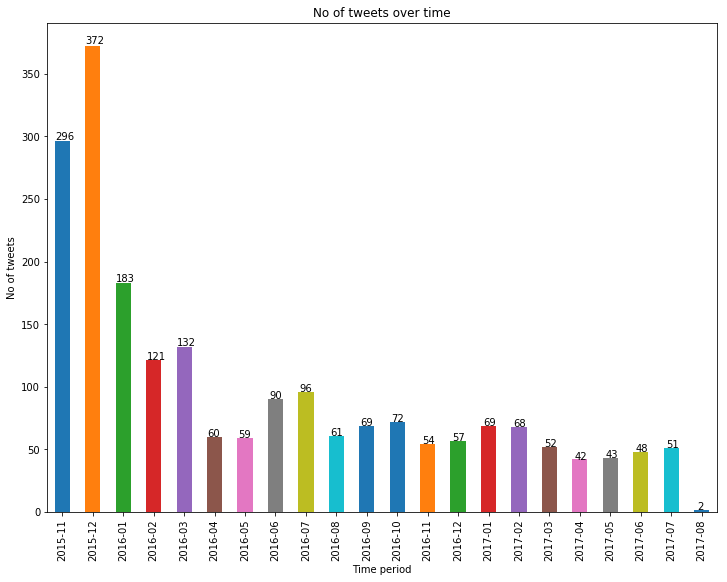

In [661]:
fig=df1['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index().plot(kind='bar')
plt.xlabel('Time period')
plt.ylabel('No of tweets')
plt.title("No of tweets over time")
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.savefig("How the tweets trended over time")

### Relationship between Retweets and Favorites

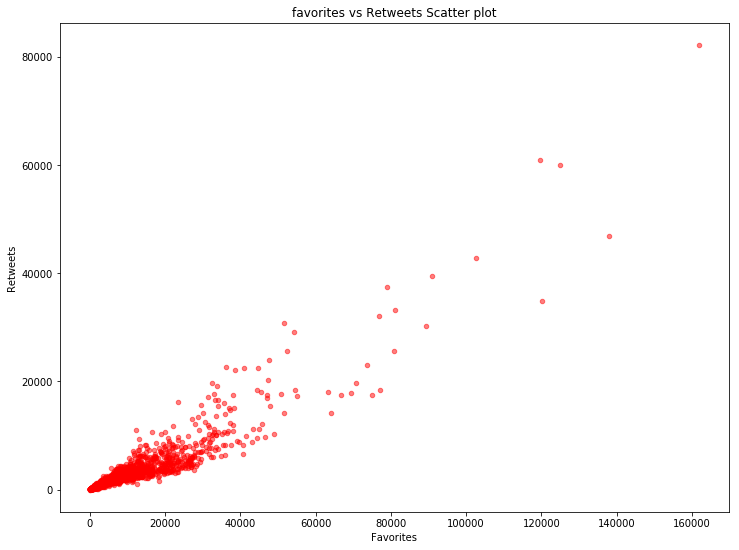

In [662]:
df1.plot(kind = 'scatter', x = 'favorites', y = 'retweets', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('favorites vs Retweets Scatter plot')
plt.savefig('Favorites vs retweets')

### Maximum retweeted tweet

In [663]:
Max_retweeted_tweet=df1.expanded_urls[df1.retweets==max(df1.retweets)]
print("The maximum number of retweet is: {}, for the tweet: {}".format(max(df1.retweets), Max_retweeted_tweet))

The maximum number of retweet is: 82207.0, for the tweet: 825    https://twitter.com/dog_rates/status/744234799360020481/video/1
Name: expanded_urls, dtype: object


### Dog Numerator rating distribution

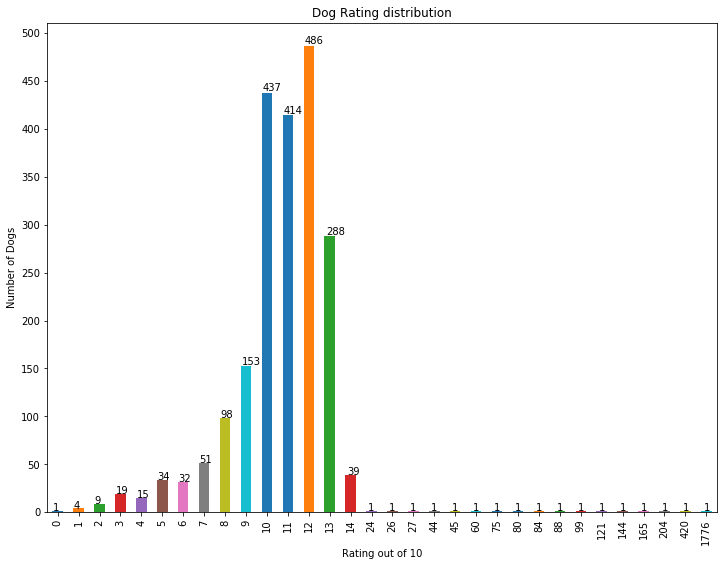

In [664]:
fig1 = df1.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
fig1.set_xlabel("Rating out of 10")
fig1.set_ylabel("Number of Dogs")
fig1.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450,500])
for p in fig1.patches:
    fig1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.savefig('Numerator rating_distribution')

### Top 5 common dog names

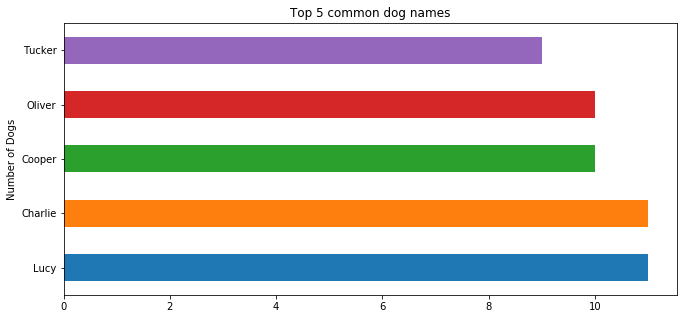

In [665]:
df1.name.value_counts()[1:6].plot('barh', figsize=(11,5), title='Top 5 common dog names').set_ylabel("Number of Dogs")
plt.savefig('Top 5 dog_names')

### Count of Dogs in different Stages

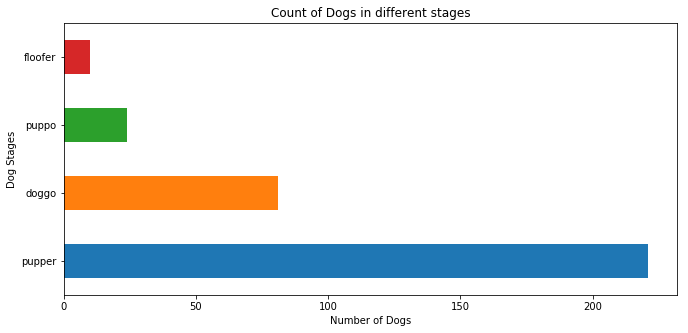

In [666]:
df1.stage[df1['stage']!= 'NaN'].value_counts().plot('barh', figsize=(11,5), title='Count of Dogs in different stages').set_xlabel("Number of Dogs")
plt.ylabel('Dog Stages')
plt.savefig('Count of dog stages')

### Identifying the most used source for the tweets

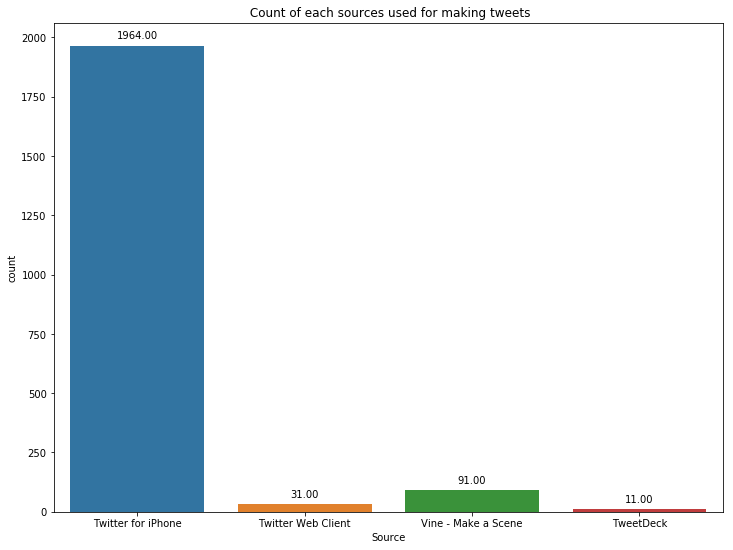

In [667]:
fig2=sns.countplot(x='source',data=df1)
plt.xlabel('Source')
plt.title(' Count of each sources used for making tweets')
for p in fig2.patches:
    fig2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.savefig('Tweet sources')    

### Rating distribution

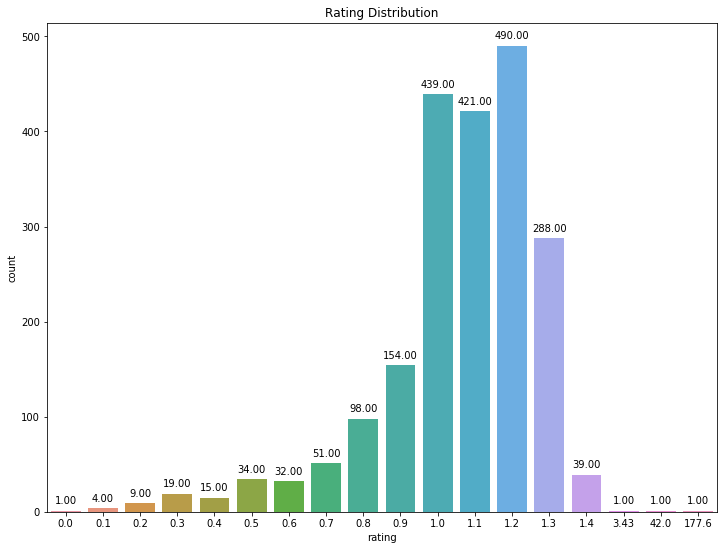

In [668]:
ax=sns.countplot(x='rating',data=df1)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.title('Rating Distribution')  
plt.savefig('Rating_distribution')

### Different Dog breeds count

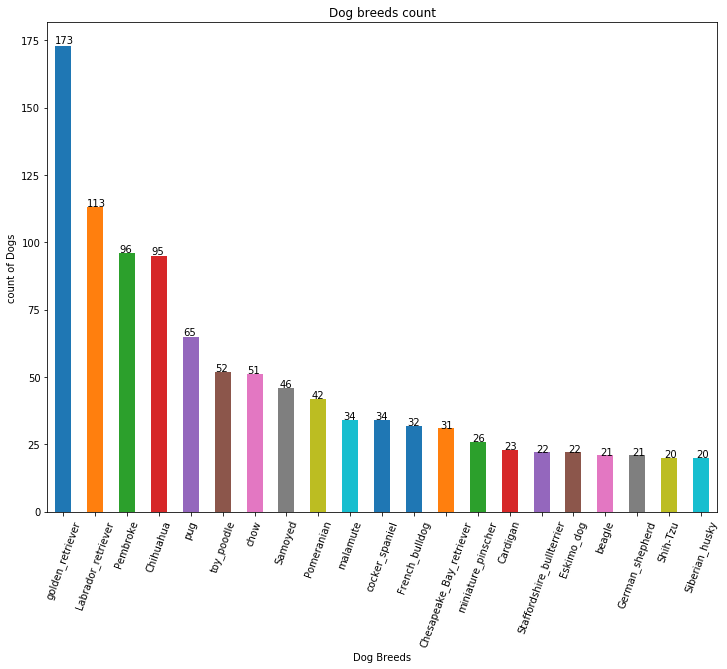

In [669]:
df2_g = df2.groupby('Breed').filter(lambda x: len(x) >= 20)
fig10=df2_g.Breed[df2.Breed!='NaN'].value_counts().plot('bar')
fig10.set_xlabel("Dog Breeds")
fig10.set_ylabel("count of Dogs")

for p in fig10.patches:
    fig10.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Dog breeds count') 
plt.xticks(rotation=70)
plt.savefig('Dog breeds count')

### Rating mean

In [670]:
df1.rating.mean()

1.165917978063899